In [1]:
import numpy as np
import matplotlib.pyplot as plt

Step 1: Generate the Simulated Paths

In [2]:
def gbm_paths(S0, T, r, delta, sigma, steps, N, seed=0):
    rng = np.random.default_rng(seed)
    h = T / steps
    Z = rng.standard_normal((steps, N))     # Generate the Std.N Random Numbers
    increments = (r - delta - 0.5 * sigma**2) * h + sigma * np.sqrt(h) * Z   # Delta_S
    ln_S0 = np.log(S0) * np.ones((1, N))     # Generate the paths
    ln_inc_cum = np.log(S0) + np.cumsum(increments, axis=0)
    ln_paths = np.vstack([ln_S0, ln_inc_cum])
    paths = np.exp(ln_paths)   # return ln St to St
    return paths    

Step 2: Apply MCV by simulated Paths

In [3]:
def mcv_paths(paths, K, r, T):
    ST = paths[-1, :]                       # last row = terminal prices
    payoffs = np.maximum(ST - K, 0)
    discounted = np.exp(-r*T) * payoffs
    price = discounted.mean()
    std_error = discounted.std(ddof=1) / np.sqrt(len(discounted))
    return price, std_error

Step 3: Compare the Precision of MCV by different number of paths

In [4]:
# N=50000
paths = gbm_paths(6849.09, 2.052, 0.0339, 0.0114, 0.2467, 100, 50000, seed=10)
price, std_error = mcv_paths(paths, 6750, 0.0339, 2.052)
print("MCV price:", price, " Std error:", std_error)

MCV price: 1108.9614761057226  Std error: 8.157725632935948


In [5]:
# What if N=250000
paths = gbm_paths(6849.09, 2.052, 0.0339, 0.0114, 0.2467, 100, 250000, seed=10)
price, std_error = mcv_paths(paths, 6750, 0.0339, 2.052)
print("MCV price:", price, " Std error:", std_error)

MCV price: 1123.2843916869288  Std error: 3.6724817324351187


Step 4: Visualize the GBM Paths

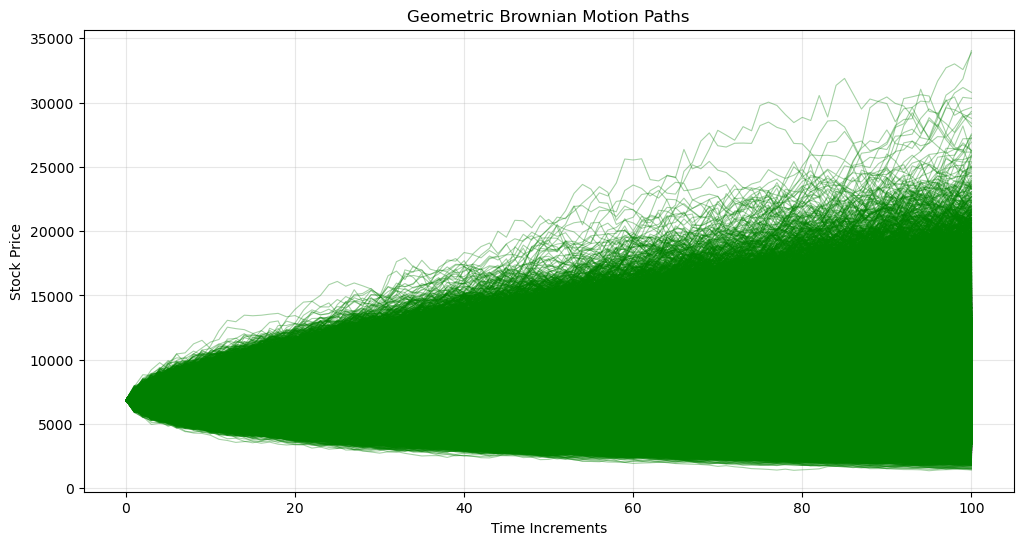

In [6]:
plt.figure(figsize=(12,6))
plt.plot(paths, linewidth=0.8, alpha=0.35, color="green")
plt.title("Geometric Brownian Motion Paths")
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.grid(True, alpha=0.3)
plt.show()

Step 5: Check the stability of MCV by Sensitivity Analysis

In [7]:
def mc_price_sigma(sigma, N=250000, seed=10):
    paths = gbm_paths(6849.09, 2.052, 0.0339, 0.0114, sigma, 100, N, seed=10)
    price, std_error = mcv_paths(paths, 6750, 0.0339, 2.052)
    return price, std_error

for sig in [0.20, 0.2467, 0.30]:
    price, std_error = mc_price_sigma(sig)
    print(sig, price, std_error)

0.2 954.8309136035903 2.9134147706194917
0.2467 1123.2843916869288 3.6724817324351187
0.3 1315.5989377767537 4.616176405184745
